In [2]:
import pathlib
import scanpy as sc
import anndata as ad
from tqdm import tqdm

In [4]:
adata = sc.read_h5ad("/oak/stanford/projects/kibr/Reorganizing/Projects/James/lipid-droplet-single-cell-pipeline/data/processed/spatial_niche_iterations/11APR2025.h5ad")

/oak/stanford/projects/kibr/Reorganizing/Projects/James/lipid-droplet-pipeline/.venv/lib/python3.12/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


/tmp/ipykernel_23125/1147424905.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  adata.obs.pivot_table(index="cell_type", columns='folder', values="lipid_droplet_area", aggfunc="mean"),


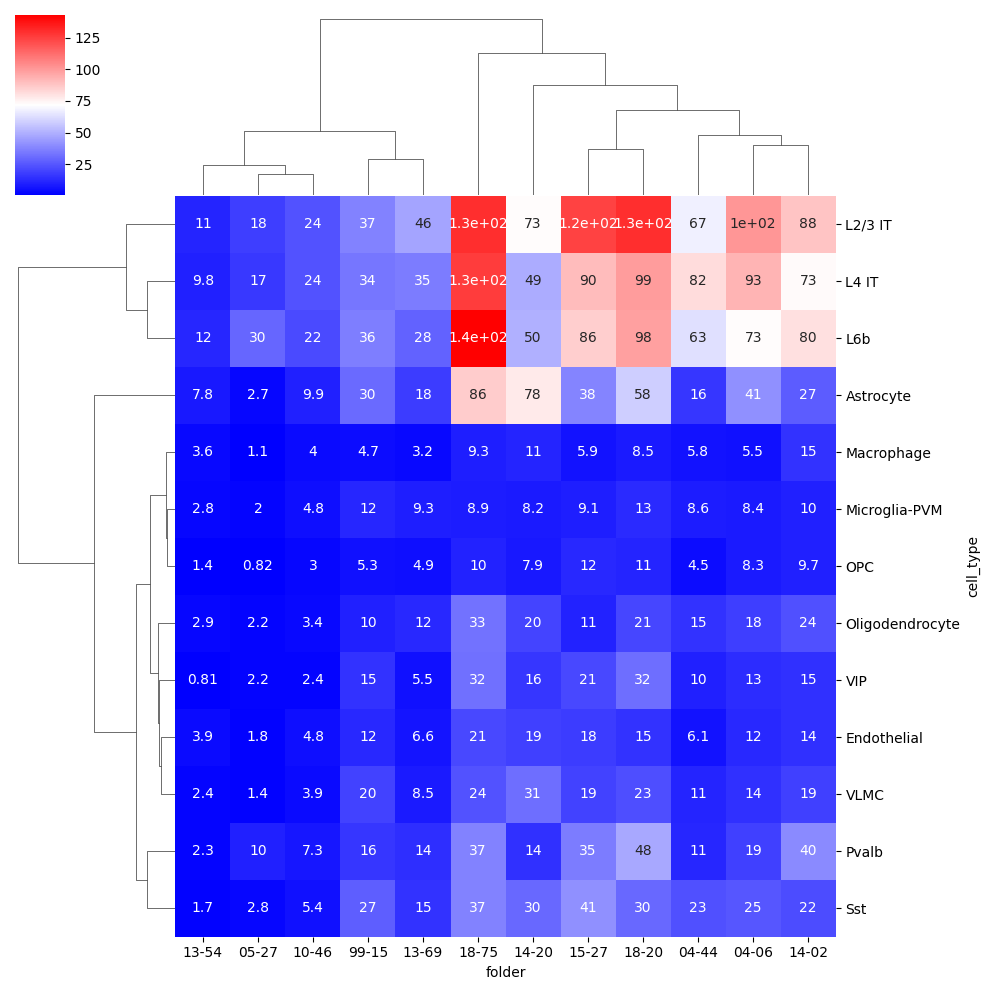

In [5]:
import seaborn as sns
sns.clustermap(
    adata.obs.pivot_table(index="cell_type", columns='folder', values="lipid_droplet_area", aggfunc="mean"), 
    annot=True,
    cmap="bwr",
)

In [7]:
group_mapping = {
    "18-20": "ND 33",
    "14-02": "ND 33",
    "10-46": "AD 33",
    "13-54": "AD 33",
    "13-69": "AD 44",
    "05-27": "AD 44",
    "14-20": "ND 33",
    "18-75": "ND 33",
    "15-27": "AD 33",
    "04-44": "AD 33",
    "04-06": "AD 44",
    "99-15": "AD 44",
}

batch_mapping = {
    "18-20": "1",
    "14-02": "1",
    "10-46": "1",
    "13-54": "1",
    "13-69": "1",
    "05-27": "1",
    "14-20": "2",
    "18-75": "2",
    "15-27": "2",
    "04-44": "2",
    "04-06": "2",
    "99-15": "2",
}

table = adata.obs.pivot_table(index="cell_type", columns='folder', values="plin2_area", aggfunc="mean").T.reset_index()
table["group"] = table["folder"].replace(group_mapping)
table["batch"] = table["folder"].replace(batch_mapping)

/tmp/ipykernel_23125/1576139041.py:31: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  table = adata.obs.pivot_table(index="cell_type", columns='folder', values="plin2_area", aggfunc="mean").T.reset_index()
/tmp/ipykernel_23125/1576139041.py:32: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  table["group"] = table["folder"].replace(group_mapping)
/tmp/ipykernel_23125/1576139041.py:33: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rena

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'Pvalb'),
  Text(1, 0, 'L4 IT'),
  Text(2, 0, 'Oligodendrocyte'),
  Text(3, 0, 'L2/3 IT'),
  Text(4, 0, 'Astrocyte'),
  Text(5, 0, 'Endothelial'),
  Text(6, 0, 'Sst'),
  Text(7, 0, 'Microglia-PVM'),
  Text(8, 0, 'VLMC'),
  Text(9, 0, 'VIP'),
  Text(10, 0, 'Macrophage'),
  Text(11, 0, 'OPC'),
  Text(12, 0, 'L6b')])

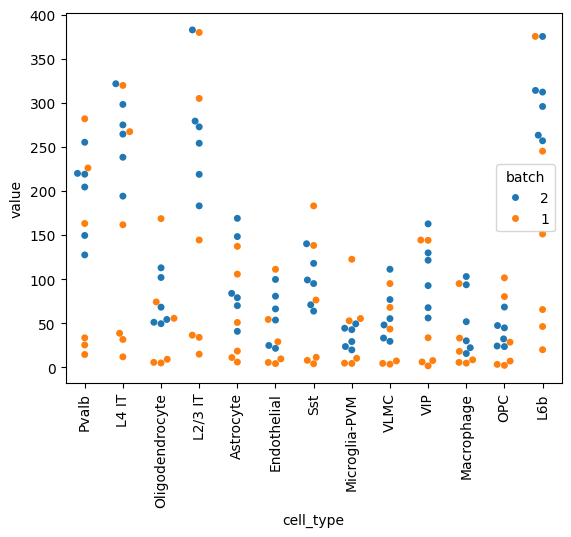

In [8]:
import matplotlib.pyplot as plt

sns.swarmplot(
    table.drop("folder", axis=1).melt(id_vars=["group", "batch"]), 
    x="cell_type", 
    y="value",
    hue="batch"
)

plt.xticks(rotation=90)




([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'Pvalb'),
  Text(1, 0, 'L4 IT'),
  Text(2, 0, 'Oligodendrocyte'),
  Text(3, 0, 'L2/3 IT'),
  Text(4, 0, 'Astrocyte'),
  Text(5, 0, 'Endothelial'),
  Text(6, 0, 'Sst'),
  Text(7, 0, 'Microglia-PVM'),
  Text(8, 0, 'VLMC'),
  Text(9, 0, 'VIP'),
  Text(10, 0, 'Macrophage'),
  Text(11, 0, 'OPC'),
  Text(12, 0, 'L6b')])

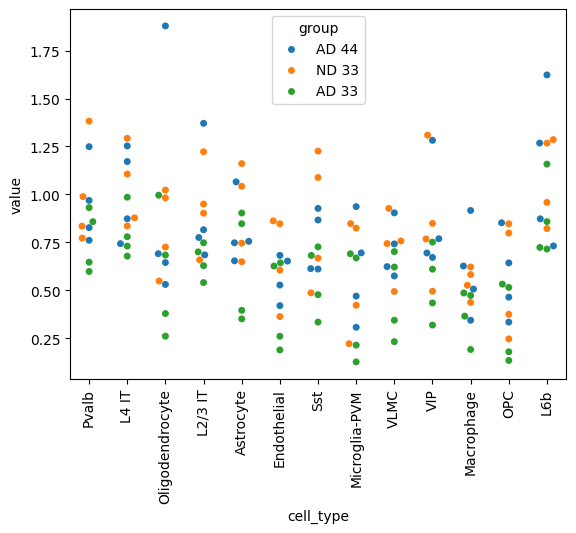

In [10]:
sns.swarmplot(
    table.drop("folder", axis=1).melt(id_vars=["group", "batch"]), 
    x="cell_type", 
    y="value",
    hue="group"
)

plt.xticks(rotation=90)